1, (#sort) Implement three-way merge sort in Python. It should at a minimum accept lists of integers as input.

In [21]:
def three_way_merge(alist):
    # Solve for edge case: a list of 2 cannot be further divided by 3.
    if len(alist) == 2:
        if alist[1] < alist[0]:
            alist[1], alist[0] = alist[0], alist[1]

    if len(alist) >= 3:
        mid1 = len(alist)//3
        mid2 = mid1*2

        # Divide the list using slicing.
        left = alist[:mid1]
        middle = alist[mid1:mid2]
        right = alist[mid2:]

        # Recursively call three_way_merge on the three thirds.
        three_way_merge(left)
        three_way_merge(middle)
        three_way_merge(right)

        i = 0
        y = 0
        j = 0
        k = 0
        
        
        # Merging the three sublists
        while i < len(left) or y < len(middle) or j < len(right):
            # min_val is used to keep track of the smallest element in the current loop instance.
            min_val = float('inf')

            # 'if' clauses are used to avoid index errors when two of the
            # three list has been exhausted
            if i < len(left):
                if left[i] < min_val:
                    min_val = left[i]

            if y < len(middle):
                if middle[y] < min_val:
                    min_val = middle[y]

            if j < len(right):
                if right[j] < min_val:
                    min_val = right[j]

            alist[k] = min_val
            k += 1
            
            # Incrementation of either i, y, or j based on what min_val is at the end of the loop.
            if i < len(left):
                if min_val == left[i]:
                    i += 1

            if y < len(middle):
                if min_val == middle[y]:
                    y += 1

            if j < len(right):
                if min_val == right[j]:
                    j += 1

lst = [10,9,8,7,6,5,4,3,2,1]
three_way_merge(lst)
print("Sorted with 3-way merge sort {}".format(lst))

Sorted with 3-way merge sort [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


2, (#sort) Implement a second version of three-way merge sort that calls insertion sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process.

In [15]:
def merge_insertion(alist):
    # If the length of the list is below the chosen index, insertion sort is called.
    if len(alist) < 4:
        insertionsort(alist)

    if len(alist) >= 4:
        mid1 = len(alist)//3
        mid2 = mid1*2

        # Divide the list using slicing.
        left = alist[:mid1]
        middle = alist[mid1:mid2]
        right = alist[mid2:]

        # Recursively call three_way_merge on the three thirds.
        merge_insertion(left)
        merge_insertion(middle)
        merge_insertion(right)

        # i, y, j are indices of left, middle, and right.
        # k is the index of the main list.
        i = 0
        y = 0
        j = 0
        k = 0
        
        # Merging
        while i < len(left) or y < len(middle) or j < len(right):
            # min_val is used to keep track of the smallest element in the current loop instance.
            min_val = float('inf')

            # 'if' clauses are used to avoid index errors when two of the
            # three list has been exhausted
            if i < len(left):
                if left[i] < min_val:
                    min_val = left[i]

            if y < len(middle):
                if middle[y] < min_val:
                    min_val = middle[y]

            if j < len(right):
                if right[j] < min_val:
                    min_val = right[j]

            alist[k] = min_val
            k += 1

            # Incrementation of either i, y, or j based on what min_val is at the end of the loop.
            if i < len(left):
                if min_val == left[i]:
                    i += 1

            if y < len(middle):
                if min_val == middle[y]:
                    y += 1

            if j < len(right):
                if min_val == right[j]:
                    j += 1

lst = [10,9,8,7,6,5,4,3,2,1]
merge_insertion(lst)
print("Sorted with merge sort + insertion sort {}".format(lst))

Sorted with merge sort + insertion sort [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


3, (#complexity, #optimalalgorithm) Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the augmented merge sort from (2). Make sure to define what each algorithm's complexity is and to enumerate the explicit assumptions made to assess each algorithm's run time. Your results should be presented in a table, along with an explanatory paragraph and any useful graphs or other charts to document your approach. Part of your analysis should indicate whether or not there is a “best” variation. Compare your benchmarks with the theoretical result we have discussed in class.

In [17]:
# 2-way Merge Sort.
def mergesort (A, start, end):
    if start < end:
        mid = (start + end) // 2
        
        # Calling merge sort using new mid, start, and end points.
        mergesort(A, start, mid)
        mergesort(A, mid + 1, end)
        merge(A, start, mid, end)
    return A


def merge(A, start, mid, end):
    # Copying data from original list into separate lists L and R for scratch space.
    n1 = mid - start + 1
    n2 = end - mid
    L = [None]*(n1 + 1)
    R = [None]*(n2 + 1)
    for i in range(n1):
        L[i] = A[start + i]
    for j in range(n2):
        R[j] = A[mid + 1 + j]
    L[n1] = float('inf')
    R[n2] = float('inf')
    i = 0
    j = 0
    
    # Comparing elements in the two data lists, putting values back in the original list accordingly.
    for k in range(start, end + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
lst = [10,9,8,7,6,5,4,3,2,1]
mergesort(lst, 0, len(lst) - 1)
print("Sorted with 2-way merge sort {}".format(lst))

Sorted with 2-way merge sort [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


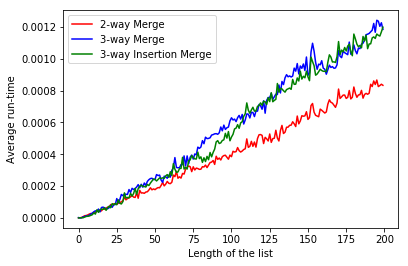

In [19]:
import time
import matplotlib.pyplot as plt
import random

# This function might take some time to run depending on how length_lst and repeats are chosen.
def graph_runtimes(length_lst, repeats):
    merge_avg = []
    three_way_avg = []
    merge_insert_avg = []

    for i in range(length_lst):
        merge_lst = []
        three_way_lst = []
        merge_insert_lst = []
        
        # repeats tells the for loop how many times to run the sort algorithms on mylist.
        # The larger repeats is, the more accurate the test will be.
        for x in range(repeats):
            # mylist is randomized at the beginning of every loop
            mylist = random.sample(range(i), i)
            
            # The running time of each algorithm on mylist is recorded in corresponding lists.
            start_time = time.time()
            mergesort(mylist, 0, len(mylist) - 1)
            finish_time = time.time() - start_time
            merge_lst.append(finish_time)

            start_time = time.time()
            three_way_merge(mylist)
            finish_time = time.time() - start_time
            three_way_lst.append(finish_time)

            start_time = time.time()
            merge_insertion(mylist)
            finish_time = time.time() - start_time
            merge_insert_lst.append(finish_time)
        
        # Results of the for loop are averaged.
        avg_merge = sum(merge_lst)/len(merge_lst)
        avg_three_way = sum(three_way_lst)/len(three_way_lst)
        avg_merge_insert = sum(merge_insert_lst)/len(merge_insert_lst)
        
        # Storing the average runtimes on different lengths of my list to another set of lists.
        merge_avg.append(avg_merge)
        three_way_avg.append(avg_three_way)
        merge_insert_avg.append(avg_merge_insert)

    plt.plot(merge_avg, color='red', label = '2-way Merge')
    plt.plot(three_way_avg, color='blue', label = '3-way Merge')
    plt.plot(merge_insert_avg, color='green', label = '3-way Insertion Merge')
    plt.xlabel("Length of the list")
    plt.ylabel("Average run-time")
    plt.legend()
    plt.show()
    
graph_runtimes(200, 1000)

3.1 Practical run-time analysis:

This practical analysis will be based on the running time of each algorithm (measured in seconds) running on my current system, using a four-core Intel I7 - 7700HQ. Though the running times will be different on other systems, the relative difference between each algorithm will be the same.

I define "practical run-time" as the average time each algorithm takes to sort a random list of n integers. In other words, imagine if people (who have the same system specifications) used these algorithms on their own list of size n, what would be the average run-time that they can expect?

To test this, I produced a graph using the function graph_runtimes(). Given an x-value, say 100, the function will generate many randomized lists of size 100, record the run-times of each sorting algorithm on those lists, average the results for each algorithm, and plot them on the graph. As the graph shows, with my current implementations of these algorithms, as the number of elements in the list increases, the gap between the average runtime of 2-way merge sort and those of the two other algorithms also increases. Therefore, from the practical perspective defined above, 2-way merge sort comes out on top as the size of the list increases.

3.2 Complexity analysis:

(a) 2-way merge sort: Assuming that the problem size n is a power of 2, and problem of size n = 1 takes constant time, the running time of 2-way merge sort can be described by the following recurrence: T(n) = 2T(n/2) + theta(n), which is equal to theta n(lg(n)), as discussed in class.

(b) 3-way merge sort: Assuming that the problem size n is a power of 3, and problem of size n = 1 takes constant time, the running time of 3-way merge sort can be described by the following recurrence: T(n) = 3T(n/3) + theta(n). With the current implementation, dividing the original list takes linear time due to slicing, and merging the list also takes linear time. The complexity is thus theta(n(log3(n))).

(c) 3-way merge sort with insertion sort: Assuming that the problem size n is a power of 3, and the problem of size n = 3 takes O(n^2) in the worst case or linear time in the best case. This is because at n = 3 (or at any other chosen point where the subdivision process stops), insertion sort is called, and that algorithm is an O(n^2) or linear process.

The recurrence: T(n): (n = 3) O(n^2); (n > 3) 3T(n/3) + Theta(n). 

Applying the recursion tree train of thought, the total amount of work done in the tree in the worst case is: n(log3(n) - 2) + 3^2.3^(log3(n) - 1) = n(log3(n)) - 2n + (9n)/3 = n(log3(n)) + n = Theta(n(log3(n))). 

In the best case, the amount of work is: n(log3(n) - 2) + 3.3^(log3(n) - 1) = n(log3(n)) - 2n + (3n)/3 = n(log3(n)) - n = theta(n(log3(n)))

This calculation is dependent on what we choose as the point where insertion sort is called. Here we chose n = 3, but it is very possible that n could be any other number. In this case, the effect of insertion sort on the recurrence will always be linear in both the best and worst case, and so the time complexity for this algorithm is still Theta(n(log3(n)))

In conclusion, theoretically and with this implementation, both 3-way mergesort and 3-way mergesort with insertion should be faster than 2-way mergesort. How these algorithms grow is shown in the following table.

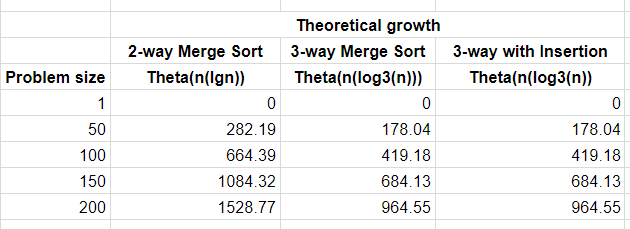

In [20]:
from IPython.display import Image
filename = "run time.png"
Image(filename)

3.2 Conclusions:

Even though a theoretical analysis of these algorithms favored the 3-way algorithms over the 2-way mergesort, a practical experiment showed otherwise. Due to the randomness and the repetitiveness of the experiment, it is safe to rely on the experiment to conclude that 2-way mergesort is the best algorithm out of the three, with the current Python implementation.

A possible reason for why the results of the theoretical and experimental analysis differ is that the current implementation for these algorithms are not fully optimized. With an optimized implementation, we will get a more conclusive answer.

Appendix

- #breakitdown: While writing the code for 3-way mergesort, I treated the problem as three subproblems and coded accordingly. The subproblems were how to divide, conquer, and combine the original list so that the list is sorted.
- #dataviz: I provided an explanation of how my graph was created and justified why it would best show the practical run-time of the sorting algorithms as a function of the list size according to my definition of "practical".